<a href="https://colab.research.google.com/github/GodstimeEdet/5G-path-loss-prediction-using-CNN/blob/in-progress/CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt



In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/dataset/train'
valid_path = '/content/drive/MyDrive/data/dataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/dataset/train/*')


In [ ]:
folders

['/content/drive/MyDrive/data/dataset/train/poor signal path',
 '/content/drive/MyDrive/data/dataset/train/average signal path',
 '/content/drive/MyDrive/data/dataset/train/good signal path']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94[0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 777 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 42 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
49/49 [==============================] - 191s 4s/step - loss: 0.7447 - accuracy: 0.9048 - val_loss: 36.8948 - val_accuracy: 0.3810
Epoch 2/10
49/49 [==============================] - 13s 265ms/step - loss: 0.7331 - accuracy: 0.9498 - val_loss: 30.5450 - val_accuracy: 0.6429
Epoch 3/10
49/49 [==============================] - 13s 264ms/step - loss: 0.7608 - accuracy: 0.9614 - val_loss: 28.6859 - val_accuracy: 0.3095
Epoch 4/10
49/49 [==============================] - 13s 266ms/step - loss: 1.0356 - accuracy: 0.9447 - val_loss: 17.4461 - val_accuracy: 0.4524
Epoch 5/10
49/49 [==============================] - 13s 266ms/step - loss: 1.3925 - accuracy: 0.9369 - val_loss: 25.9793 - val_accuracy: 0.6429
Epoch 6/10
49/49 [==============================] - 14s 291ms/step - loss: 1.1058 - accuracy: 0.9562 - val_loss: 28.2629 - val_accuracy: 0.6429
Epoch 7/10
49/49 [==============================] - 13s 264ms/step - loss: 0.7872 - accuracy: 0.9562 - val_loss: 29.4301 - val_accuracy: 0

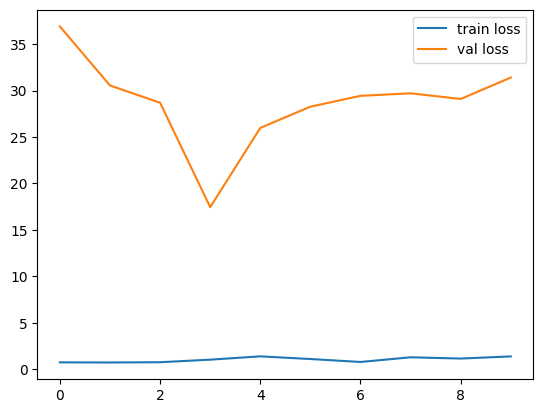

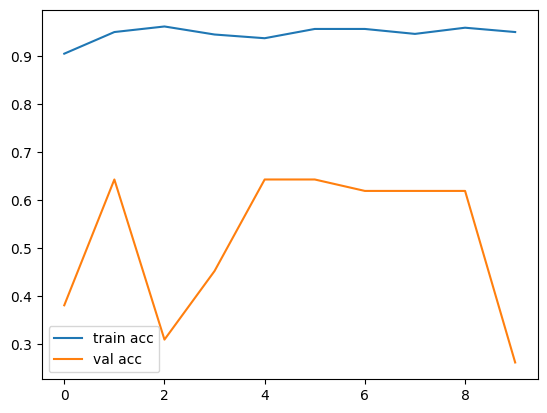

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/data/dataset/model_resnet50.h5')


In [ ]:
y_pred = model.predict(test_set)

3/3 [==============================] - 1s 66ms/step


In [ ]:
y_pred


array([[7.54188595e-25, 3.70575562e-02, 9.62942481e-01],
       [1.47780144e-28, 9.99349773e-01, 6.50186616e-04],
       [0.00000000e+00, 1.00000000e+00, 3.15786455e-35],
       [0.00000000e+00, 1.00000000e+00, 3.12660417e-27],
       [8.69591574e-27, 6.11800134e-01, 3.88199836e-01],
       [0.00000000e+00, 1.00000000e+00, 1.52614826e-33],
       [6.85006873e-31, 1.00000000e+00, 4.57329685e-09],
       [3.10507256e-31, 8.33799243e-01, 1.66200817e-01],
       [0.00000000e+00, 1.00000000e+00, 7.45647336e-38],
       [0.00000000e+00, 1.00000000e+00, 7.10962861e-35],
       [1.38090303e-32, 1.00000000e+00, 7.67438847e-13],
       [4.32725414e-34, 1.00000000e+00, 7.82285274e-14],
       [5.23905089e-28, 1.00000000e+00, 4.96275373e-12],
       [5.05076458e-33, 1.00000000e+00, 1.31488719e-14],
       [3.60257163e-35, 1.00000000e+00, 2.26400905e-18],
       [0.00000000e+00, 1.00000000e+00, 4.60143032e-30],
       [8.94186162e-28, 1.56109425e-04, 9.99843836e-01],
       [1.07280956e-32, 1.00000

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred


array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/data/dataset/model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/data/dataset/test/good signal path/6588.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[186., 164., 151.],
        [187., 167., 156.],
        [189., 171., 161.],
        ...,
        [206., 150., 125.],
        [200., 128., 104.],
        [210., 130., 105.]],

       [[195., 173., 162.],
        [196., 176., 165.],
        [195., 178., 170.],
        ...,
        [208., 154., 130.],
        [197., 129., 106.],
        [205., 129., 105.]],

       [[220., 200., 191.],
        [221., 202., 195.],
        [212., 197., 192.],
        ...,
        [209., 161., 139.],
        [193., 131., 110.],
        [195., 124., 102.]],

       ...,

       [[ 75.,  89.,  66.],
        [ 73.,  87.,  64.],
        [ 72.,  84.,  62.],
        ...,
        [ 97., 105.,  81.],
        [ 91.,  99.,  76.],
        [ 84.,  94.,  70.]],

       [[ 75.,  87.,  67.],
        [ 74.,  86.,  64.],
        [ 72.,  81.,  60.],
        ...,
        [ 97., 102.,  79.],
        [ 91.,  96.,  74.],
        [ 84.,  92.,  69.]],

       [[ 62.,  74.,  54.],
        [ 67.,  79.,  59.],
        [ 71.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[4.7450104e-08, 9.9297637e-01, 7.0235948e-03]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 42ms/step


In [ ]:
a==1

array([ True])

In [ ]:
a==2

array([False])

In [ ]:
a==3

array([False])